<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/Restauracion_imgs/restore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP - Restauración de Imágenes
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

###Imports a utilizar

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

####Cargamos imágenes

In [3]:
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/Restauracion_imgs/pic/lenna.gif

clear_output()

###1. Filtros pasa bajos

####mostramos imagen original y definimos funciones a utilizar

In [ ]:
#definimos la funcion del filtro: recibe el tamaño del kernel,
#y la imagen sobre la que se aplica el filtro, se usa filtro promediador
def ApplyLowPass(img, k_size=3):
  kernel = np.full((k_size, k_size), 1)/(k_size**2)
  return cv2.filter2D(img,-1,kernel)

#ploteamos secuencia
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)

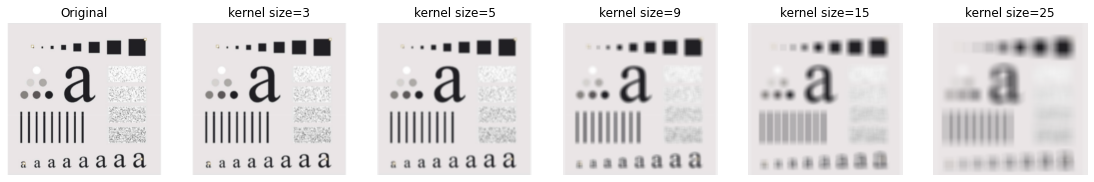

In [ ]:
#Original
lenna = cv2.imread('lenna.gif')
kernel_sizes = [3,5,9,15,25]
fig_a = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

MakeSubplot(letra_a,fig_a,1,6,1,title="Original")

for i in range(len(kernel_sizes)):
  filtered = ApplyLowPass(letra_a, kernel_sizes[i])
  MakeSubplot(filtered,fig_a,1,6,i+2,title='kernel size='+str(kernel_sizes[i]))

###2. Filtros pasa bajos con threshold

In [ ]:
#definimos la funcion del filtro: recibe el tamaño del kernel,
#y la imagen sobre la que se aplica el filtro, se usa filtro promediador
def ApplyLowPassWThreshold(img, k_size=3, thresh=0.25):
  kernel = np.full((k_size, k_size), 1)/(k_size**2)
  low_pass = cv2.filter2D(img,-1,kernel)
  def threshold(filtered, thresh=0.25):
    filtered[filtered > (255*0.25)] = 255
    filtered[filtered < 255*0.25] = 0
    return filtered
  thresh = threshold(np.copy(low_pass), thresh=0.25)
  return low_pass, thresh

#ploteamos secuencia
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)